In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# EMRAX 268 400Nm 400Vdc
# Source: http://emrax.com/wp-content/uploads/2017/01/emrax_268_technical_data_4.5.pdf
data = {'rpm':[2147, 2101, 1942, 1863, 1770, 1689],
        'torque':[158.70, 186.34, 274.15, 312.01, 359.47, 399.56],
        'p_mech':[35.676, 41.005, 55.762, 60.868, 66.626, 70.672],
        'im_s':[80.28, 94.11, 141.30, 162.84, 190.02, 219.17],
        'eta_m':[0.980, 0.979, 0.959, 0.949, 0.940, 0.920],
        'eta_ecu':[0.980, 0.979, 0.973, 0.970, 0.965, 0.960],
        'eta':[0.961, 0.958, 0.933, 0.920, 0.908, 0.883]
       }
assert len(data['rpm'])    == \
       len(data['torque']) == \
       len(data['p_mech']) == \
       len(data['im_s'])   == \
       len(data['eta_m'])   == \
       len(data['eta_ecu'])   == \
       len(data['eta'])

for i in data:
    data[i] = np.array(data[i])

In [3]:
# EMRAX 268 350Nm 400Vdc with Field Weakening
# Source: http://emrax.com/wp-content/uploads/2017/01/emrax_268_technical_data_4.5.pdf
data_fw = {'rpm':[],
           'torque':[],
           'p_mech':[],
           'im_s':[],
           'eta_m':[],
           'eta_ecu':[],
           'eta':[]
       }
assert len(data_fw['rpm'])    == \
       len(data_fw['torque']) == \
       len(data_fw['p_mech']) == \
       len(data_fw['im_s'])   == \
       len(data_fw['eta_m'])   == \
       len(data_fw['eta_ecu'])   == \
       len(data_fw['eta'])

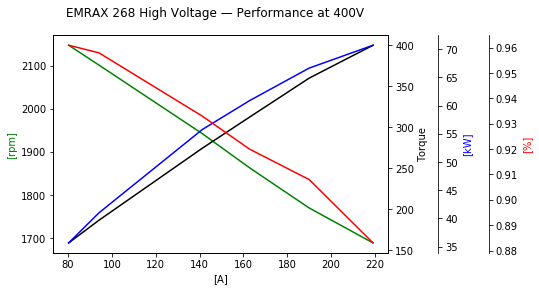

In [4]:
fig, ax1 = plt.subplots()

fig.suptitle(f'EMRAX 268 High Voltage — Performance at 400V')

ax2 = ax1.twinx()
ax3 = ax1.twinx()
# ax4 = ax1.twinx()
ax5 = ax1.twinx()

ax3.spines["right"].set_position(("axes", 1.15))
# ax4.spines["right"].set_position(("axes", 1.2))
ax5.spines["right"].set_position(("axes", 1.3))

p1 = ax1.plot(data['im_s'], data['rpm'], color='green', label='[rpm]')
p2 = ax2.plot(data['im_s'], data['torque'], color='black', label='Torque')
p3 = ax3.plot(data['im_s'], data['p_mech'], color='blue', label='[kW]')
# p4 = ax4.plot(data['im_s'], color='orange', label='[A]')
p5 = ax5.plot(data['im_s'], data['eta'], color='red', label='[%]')

ax1.set_xlabel("[A]")
ax1.set_ylabel(p1[0].get_label())
ax2.set_ylabel(p2[0].get_label())
ax3.set_ylabel(p3[0].get_label())
# ax4.set_ylabel(p4[0].get_label())
ax5.set_ylabel(p5[0].get_label())

ax1.yaxis.label.set_color(p1[0].get_color())
ax2.yaxis.label.set_color(p2[0].get_color())
ax3.yaxis.label.set_color(p3[0].get_color())
# ax4.yaxis.label.set_color(p4[0].get_color())
ax5.yaxis.label.set_color(p5[0].get_color())

plt.show()

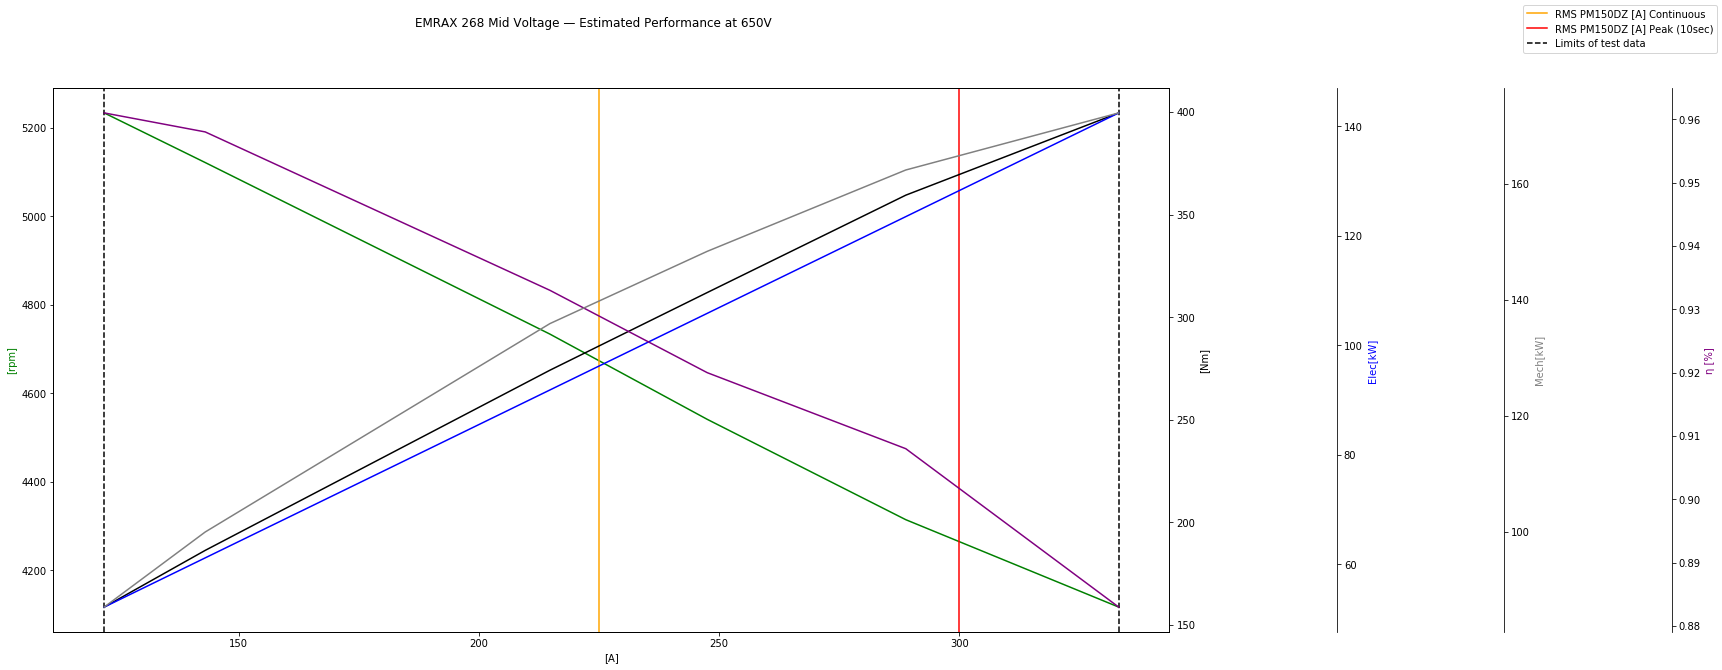

In [56]:

# Nominal DC tractive bus voltage
V = 650

# Current and Voltage factors applied to transform data for the Medium Voltage configuration of the EMRAX 268. Factors are from the datasheet.
current_factor = 1.52
voltage_factor = (2/3)

# References:
# - https://electronics.stackexchange.com/questions/187226/how-does-voltage-and-current-affect-speed-and-torque-of-a-motor
# - https://www.precisionmicrodrives.com/content/dc-motor-speed-voltage-and-torque-relationships/

fig, ax1 = plt.subplots(figsize=(20, 10))

fig.suptitle(f'EMRAX 268 Mid Voltage — Estimated Performance at {V}V')

ax2 = ax1.twinx()
ax4 = ax1.twinx()
ax5 = ax1.twinx()
ax6 = ax1.twinx()


ax4.spines["right"].set_position(("axes", 1.15))
ax6.spines["right"].set_position(("axes", 1.30))
ax5.spines["right"].set_position(("axes", 1.45))

# Current multiplied by factor to account for MV motor, per datasheet
i = data['im_s']*current_factor

# Original voltage multiplied by factor to account for MV motor, per datasheet
# RPM scaled for higher voltage
rpm = data['rpm']/(400*voltage_factor)*V
elec_p = (data['im_s']*V)/1000
mech_p = (data['torque']*rpm*2*np.pi)/(60*1000)

p1 = ax1.plot(i, rpm, color='green', label='[rpm]')
p2 = ax2.plot(i, data['torque'], color='black', label='[Nm]')
p4 = ax4.plot(i, elec_p, color='blue', label='Elec[kW]')
p5 = ax5.plot(i, data['eta'], color='purple', label='η [%]')
p6 = ax6.plot(i, mech_p, color='grey', label='Mech[kW]')

l1 = ax1.axvline(225, color='orange', label='RMS PM150DZ [A] Continuous')
l2 = ax1.axvline(300, color='red', label='RMS PM150DZ [A] Peak (10sec)')
l3 = ax1.axvline(219.17*1.52, color='black', label='Limits of test data', linestyle='dashed')
l4 = ax1.axvline(80.28*1.52, color='black', label='Limits of test data', linestyle='dashed')

ax1.set_xlabel("[A]")
ax1.set_ylabel(p1[0].get_label())
ax2.set_ylabel(p2[0].get_label())
ax4.set_ylabel(p4[0].get_label())
ax5.set_ylabel(p5[0].get_label())
ax6.set_ylabel(p6[0].get_label())

ax1.yaxis.label.set_color(p1[0].get_color())
ax2.yaxis.label.set_color(p2[0].get_color())
ax4.yaxis.label.set_color(p4[0].get_color())
ax5.yaxis.label.set_color(p5[0].get_color())
ax6.yaxis.label.set_color(p6[0].get_color())

lines = [l1, l2, l3]
fig.legend(lines, [l.get_label() for l in lines])

plt.show()

In [53]:
MAX_RPM = 4850
speed_of_sound = 340 # m/s
M = 0.95 # tip mach number

max_tip_speed = speed_of_sound * M # meters/sec
max_dia = max_tip_speed*60 / (np.pi*MAX_RPM) # meters

print(f"Maximum Tip Speed: {max_tip_speed} m/s")
print(f"Maximum Diameter: {max_dia} meters")
print(f"Maximum Diameter: {max_dia*39.37} inches")

Maximum Tip Speed: 323.0 m/s
Maximum Diameter: 1.2719269266478068 meters
Maximum Diameter: 50.07576310212415 inches


In [7]:
# Inverter Power Loss
# Ploss = a * VDC^b * Iout^c + offset
# a = 0.000244
# b = 1.072
# c = 1.695
# offset = 456.4
#
# Ploss = power loss in watts
# Iout = motor current in Arms
# VDC = DC bus voltage

def power_loss(vdc, Iout):
     return 0.000244 * vdc**1.072 * Iout**1.695 + 456.4


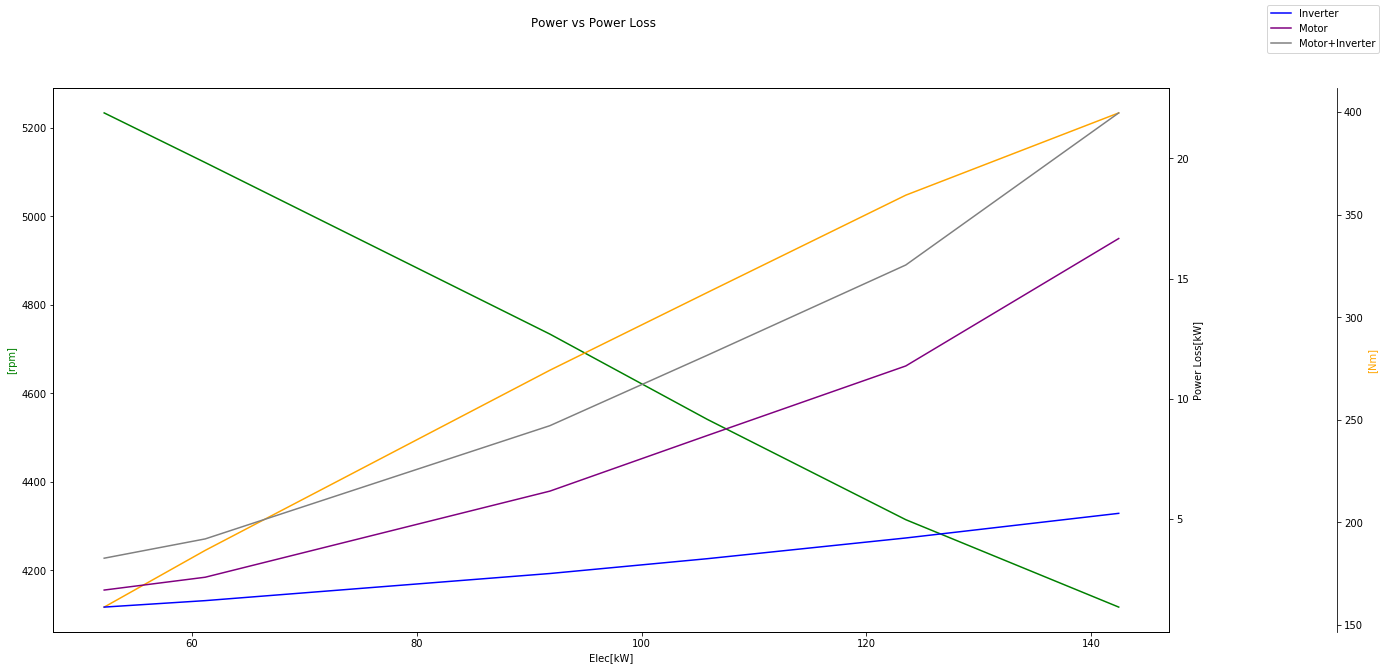

In [57]:
fig, ax1 = plt.subplots(figsize=(20, 10))

fig.suptitle("Power vs Power Loss")

ax2 = ax1.twinx()
ax3 = ax1.twinx()
# ax4 = ax1.twinx()
# ax5 = ax1.twinx()

ax2.spines["right"].set_position(("axes", 1.15))
# ax4.spines["right"].set_position(("axes", 1.30))
# ax5.spines["right"].set_position(("axes", 1.45))

inverter_power_losses = [power_loss(V,x)/1000 for x in i]
# Efficiency is from test data at 400V. Efficency may increase with higher voltage.
motor_power_losses = elec_p*(1-data['eta'])

p1 = ax1.plot(elec_p, rpm, color='green', label='[rpm]')
p2 = ax2.plot(elec_p, data['torque'], color='orange', label='[Nm]')
p3 = ax3.plot(elec_p, inverter_power_losses, color='blue', label='Inverter')
p4 = ax3.plot(elec_p, motor_power_losses, color='purple', label='Motor')
p5 = ax3.plot(elec_p, motor_power_losses + inverter_power_losses, color='grey', label='Motor+Inverter')

ax1.set_xlabel("Elec[kW]")
ax1.set_ylabel(p1[0].get_label())
ax2.set_ylabel(p2[0].get_label())
ax3.set_ylabel('Power Loss[kW]')
# ax4.set_ylabel(p4[0].get_label())
# ax5.set_ylabel(p5[0].get_label())

ax1.yaxis.label.set_color(p1[0].get_color())
ax2.yaxis.label.set_color(p2[0].get_color())
# ax3.yaxis.label.set_color(p3[0].get_color())
# ax4.yaxis.label.set_color(p4[0].get_color())
# ax5.yaxis.label.set_color(p5[0].get_color())

lines = [p3[0], p4[0], p5[0]]

fig.legend(lines, [l.get_label() for l in lines])

plt.show()